#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [ ]:
from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model
from model_evaluation import evaluate_model

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten
from tensorflow import keras


In [ ]:
def main ():
    from tensorflow.keras.datasets import cifar10
    raw_data = get_data (cifar10)

    Xy_data = get_train_test_data (raw_data)

    Xy_data_normalised = normalise_data (Xy_data)

    return Xy_data_normalised

In [4]:
def main2 ():
    '''Function for running the model from importing the data to training and 
    evalution.'''
    from tensorflow.keras.datasets import cifar10
    data_model = create_pipeline ([
                                   get_data, 
                                   get_train_test_data, 
                                   normalise_data, 
                                   create_model (
                                       input_layer = Input (shape = (32, 32, 3)), 
                                       hidden_layers = [Flatten (),
                                                        Dense (64, activation = "relu"), 
                                                        Dense (64, activation = "relu"), 
                                                        Dense (10)
                                                        ]
                                                 ),
                                   compile_model2 (optimizer = "Adam",
                                                  loss = "sparse_categorical_crossentropy",
                                                  metrics = ["accuracy", "sparse_categorical_accuracy"]),
                                   train_model (batch_size = 32, epochs = 5),
                                   evaluate_model ()
                                   ])   #   This is a function
                                   #   Not sure if this is the best way to do 
                                   #   this. Maybe it would be better to create 
                                   #   the model and then add the returned 
                                   #   function to the pipeline.

                        #   The 'Flatten' layer is need. It reshapes the data so
                        #   the following layers output shape is one dimension. 
                        #   This is needed so the model will output the label
                        #   for each photo in the dataset. The output shape for
                        #   the end of the model is (None, 10), 10 being the 10
                        #   labels in the dataset. Without the 'Flatten' layer
                        #   the output shape of the model is (None, 32, 32, 10).
                        #   This results in a error due to the output having a 
                        #   different shape to the labels in 'y.' So, the 
                        #   'Flatten' causes the model to output a digit, which
                        #   corresponds to the label.

    data_n_model = data_model (cifar10)   #   initializing function


    return data_n_model

#### Before compile

In [5]:
test_data = main2 ()

170508288/170498071 [==============================] - 2s 0us/step
Model compiled for compile_model2
Start model training.
Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3428 - accuracy: 0.0861 - sparse_categorical_accuracy: 0.0861
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0861 - sparse_categorical_accuracy: 0.0861
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0861 - sparse_categorical_accuracy: 0.0861
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0861 - sparse_categorical_accuracy: 0.0861
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0861 - sparse_categorical_accuracy: 0.0861
Completed model training.


In [ ]:
test_data.model.summary ()

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


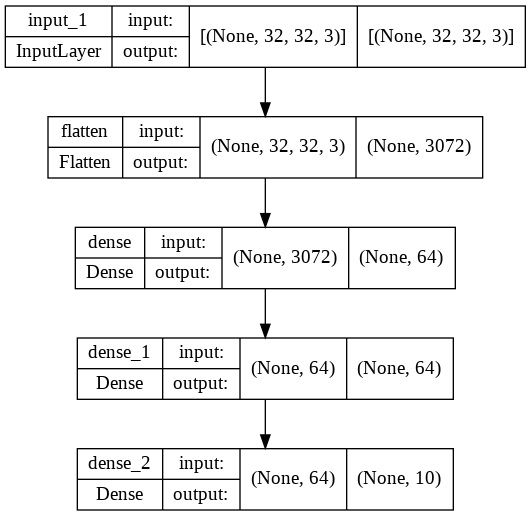

In [ ]:
keras.utils.plot_model (test_data.model, show_shapes = True)

In [ ]:
display (test_data._fields,
         test_data.data_raw._fields,
         test_data.data_normalised._fields)

('data_raw', 'data_normalised', 'model')

('X_train', 'y_train', 'X_test', 'y_test')

('X_train_norm', 'y_train', 'X_test_norm', 'y_test')

#### After compile

In [ ]:
test_data_model = main2 ()

Model compiled for compile_model2


In [ ]:
test_data_model.model.compiled_loss._losses

'sparse_categorical_crossentropy'

In [ ]:
test_data_model.model.compiled_metrics._metrics

['accuracy', 'sparse_categorical_accuracy']

In [ ]:
test_data_model.model.optimizer

In [ ]:
def model_compile_info (data_model):
    '''Get information on the compiled model.'''

    print (data_model.model.compiled_loss._losses, "\n",
           data_model.model.compiled_metrics._metrics, "\n",
           data_model.model.optimizer)

#### Training

In [5]:
train_model_n_data = main2 ()

170508288/170498071 [==============================] - 6s 0us/step
Model compiled for compile_model2
Start model training.
Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8143 - accuracy: 0.0999 - sparse_categorical_accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8090 - accuracy: 0.1048 - sparse_categorical_accuracy: 0.1048
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8090 - accuracy: 0.1108 - sparse_categorical_accuracy: 0.1108
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8090 - accuracy: 0.1064 - sparse_categorical_accuracy: 0.1064
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 8.8377 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Completed model training.
313/313 [==============================] - 1s 1ms/step - loss: 9.6685 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
The accuracy of the model is 

In [14]:
train_model_n_data._fields

('data_raw', 'data_normalised', 'model')

In [15]:
train_model_n_data.model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(3072, 64) dtype=float32, numpy=
 array([[-0.04432244,  0.03364358,  0.02431631, ..., -0.00295779,
         -0.01010658, -0.00913054],
        [-0.03034542,  0.03407824, -0.03149875, ..., -0.01232424,
          0.02883696, -0.01008507],
        [ 0.01657302, -0.03177746,  0.03533473, ..., -0.01788753,
          0.01966297, -0.02566122],
        ...,
        [-0.0456748 , -0.02227925, -0.02862467, ...,  0.03216184,
          0.01049042, -0.00857286],
        [-0.00272387,  0.03168443,  0.02875025, ...,  0.01231386,
         -0.02456713, -0.00307345],
        [-0.02392812,  0.02289436, -0.0032541 , ...,  0.01467762,
         -0.03135972, -0.0431419 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.00600524, -0.00600542, -0.00247608, -0.00600533, -0.00827266,
         0.        , -0.0113855 , -0.02296088, -0.00211273,  0.03058543,
        -0.00553544, -0.00516987,  0.01323165, -0.00599777, -0.02066939,
 